# Bubble Plot

O gráfico de bolhas (ou bubble plot) é uma variação do gráfico de dispersão (scatter plot) que permite visualizar três dimensões de dados em um plano 2D. Ele é composto por:

- Eixos X e Y – Representam duas variáveis quantitativas, assim como em um gráfico de dispersão tradicional.

- Tamanho das Bolhas – A terceira variável é representada pelo tamanho (área ou diâmetro) de cada bolha, permitindo comparar magnitudes adicionais.

- Cor das Bolhas (Opcional) – Pode ser usada para incluir uma quarta dimensão, como categorias ou intensidade de um fenômeno.

São vantagens do Bubble plot:

- Mostra múltiplas dimensões em uma única visualização.

- É sensível a variações de escala.

São ônus do Bubble plot:

- Bolhas muito grandes podem se sobrepor e dificultar a leitura.

- Por vezes requer a assistência de legendas claras para evitar confusão, principalmente quando se faz uso de cor.

Neste notebook faremos uma demonstração da aplicação do Bubble plot.

## Preparativos

Iremos explorar o dataset [Weather Data](https://www.kaggle.com/datasets/rohitgrewal/weather-data) oferecido no site Kaggle. Este descreve a observação de condições climáticas em um mesmo local (não identificado), com periodicidade de hora em hora, pela duração de um ano. Fazendo uso da sua API, baixamos o dataset comprimido e o extraímos localmente. Esta é uma etapa explicitada para fins declarativos, tido que o dataset utilizado já acompanha o presente código em seu repositório git.

In [20]:
import os
import zipfile

os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
!kaggle datasets download -d rohitgrewal/weather-data
with zipfile.ZipFile("weather-data.zip", 'r') as zip_ref:
    zip_ref.extractall(f"./{dataset_pathm2}")

## Organização do conjunto de dados

Carregamos o dataset e o visualizamos. A partir desta visualização identificamos três fatores a serem ajustados:

1. A coluna `Date/Time` não segue o formato padrão YYYY-MM-DD HH:MM:SS para data e hora.
2. A coluna `weather` classifica as condições climáticas no momento da observação e, por vezes, mais de uma classificação se aplica.
3. Para fins de apresentação localizaremos as colunas do dataset e as classificações climáticas para o Português Brasileiro.

In [1]:
import pandas as pd
df = pd.read_csv("Project 1 - Weather Dataset.csv")
display(df.head(10))
df.info()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,1/1/2012 7:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,1/1/2012 8:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,1/1/2012 9:00,-1.3,-3.1,88,15,4.0,101.20,Fog


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


A seguir:

1. Padronizamos o formato de data e hora.
2. Renomeamos as colunas para o Português Brasileiro. 
3. Criamos colunas adicionais para identificar a condição climática em vigor usando _One-Hot Encoding_ para rápida identificação
4. Fazemos a coluna "Condições Climáticas" armazenar uma lista de strings correspondente às condições climáticas aplicáveis;

In [2]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
dummies = df['Weather'].str.get_dummies(sep=',')
df= pd.concat([df, dummies], axis=1)
df = df.rename(columns={
    "Date/Time": "Data e hora",
    "Temp_C": "Temperatura (C)",
    "Dew Point Temp_C": "Ponto de orvalho (C)",
    "Rel Hum_%": "Umidade relativa (%)",
    "Wind Speed_km/h": "Velocidade do vento (km/h)",
    "Visibility_km": "Visibilidade (km)",
    "Press_kPa": "Pressão atmosférica (kPa)",
    "Weather": "Condições climáticas",
    "Blowing Snow": "Nevasca",
    "Clear": "Céu Claro",
    "Cloudy": "Nublado",
    "Drizzle": "Garoa",
    "Fog": "Neblina",
    "Freezing Drizzle": "Garoa Congelante",
    "Freezing Fog": "Neblina Contelante",
    "Freezing Rain": "Chuva Congelante",
    "Haze": "Névoa Seca",
    "Heavy Rain Showers": "Pancadas de chuva intensas",
    "Ice Pellets": "Granizo fino",
    "Mainly Clear": "Céu predominantemente claro",
    "Mostly Cloudy": "Céu predominantemente nublado",
    "Moderate Rain": "Chuva moderada",
    "Moderate Rain Showers": "Pancadas de chuva moderadas",
    "Moderate Snow": "Neve Moderada",
    "Rain": "Chuva",
    "Rain Showers": "Pancadas de chuva",
    "Snow": "Neve",
    "Snow Grains": "Grãos de neve",
    "Snow Pellets": "Granizo",
    "Snow Showers": "Neve dispersa",
    "Thunderstorms": "Trovoadas"
})
weather_conditions = df.columns.tolist()[8:]
df["Condições climáticas"] = df[weather_conditions].apply(
    lambda row: list(row.index[row == 1]),
    axis = 1
)
display(df.head(20))

,Data e hora,Temperatura (C),Ponto de orvalho (C),Umidade relativa (%),Velocidade do vento (km/h),Visibilidade (km),Pressão atmosférica (kPa),Condições climáticas,Nevasca,Céu Claro,...,Pancadas de chuva moderadas,Neve Moderada,Céu predominantemente nublado,Chuva,Pancadas de chuva,Neve,Grãos de neve,Granizo,Neve dispersa,Trovoadas
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,[Neblina],0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,[Neblina],0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"[Neblina, Garoa Congelante]",0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"[Neblina, Garoa Congelante]",0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,[Neblina],0,0,...,0,0,0,0,0,0,0,0,0,0
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,[Neblina],0,0,...,0,0,0,0,0,0,0,0,0,0
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,[Neblina],0,0,...,0,0,0,0,0,0,0,0,0,0
7,2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,[Neblina],0,0,...,0,0,0,0,0,0,0,0,0,0
8,2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,[Neblina],0,0,...,0,0,0,0,0,0,0,0,0,0
9,2012-01-01 09:00:00,-1.3,-3.1,88,15,4.0,101.20,[Neblina],0,0,...,0,0,0,0,0,0,0,0,0,0


## Sumário dos dados

Criamos um sumário das grandezas sendo mensuradas em nosso dataset, em termos de:

- Mediana (mean)
- Média (median)
- Valor máximo (max)
- Valor mínimo (min)
- Desvio padrão (std)

Com isso sabemos que o local onde as mensurações foram feitas:

- Apresenta temperaturas relativamente baixas, com propensão a nevar.
- Ponto de orvalho mediano.
- Humidade relativa acima da média.
- Ocorrência constante de brisas.
- Excelente visibilidade, forte indicativo de baixa poluição no ar.
- Uma pressão atmosférica que corresponde a uma altura de aproximadamente 22 metros acima do nível do mar.

In [3]:
numeric_cols = df.columns.tolist()[1:7]
stats = df[numeric_cols].agg(['mean','median', 'max', 'min', 'std'])
condition_counts = df[weather_conditions].sum().sort_values(ascending=False)

print(stats)
print("\nCondições climáticas mais frequentes:")
print(condition_counts.head(5))

        Temperatura (C)  Ponto de orvalho (C)  Umidade relativa (%)  \
mean           8.798144              2.555294             67.431694   
median         9.300000              3.300000             68.000000   
max           33.000000             24.400000            100.000000   
min          -23.300000            -28.500000             18.000000   
std           11.687883             10.883072             16.918881   

        Velocidade do vento (km/h)  Visibilidade (km)  \
mean                     14.945469          27.664447   
median                   13.000000          25.000000   
max                      83.000000          48.300000   
min                       0.000000           0.200000   
std                       8.688696          12.622688   

        Pressão atmosférica (kPa)  
mean                   101.051623  
median                 101.070000  
max                    103.650000  
min                     97.520000  
std                      0.844005  

Condições cli

In [4]:
def pressure_to_altitude(P_h, P0=101.325, T0=288.15, L=0.0065, g=9.80665, M=0.0289644, R=8.31446):
    """
    Calculate altitude (in meters) from atmospheric pressure using the barometric formula.
    
    Parameters:
        P_h (float): Measured pressure (kPa).
        P0 (float): Sea-level standard pressure (default: 101.325 kPa).
        T0 (float): Sea-level standard temperature in Kelvin (default: 288.15 K, 15°C).
        L (float): Temperature lapse rate (default: 0.0065 K/m).
        g (float): Gravitational acceleration (default: 9.80665 m/s²).
        M (float): Molar mass of dry air (default: 0.0289644 kg/mol).
        R (float): Universal gas constant (default: 8.31446 J/(mol·K)).
    
    Returns:
        float: Altitude in meters.
    """
    # Avoid division by zero or invalid log inputs
    if P_h <= 0 or P_h > P0:
        raise ValueError(f"Pressure must be 0 < P_h ≤ {P0} kPa")
    
    # Calculate altitude using inverted barometric formula
    exponent = (R * L) / (g * M)
    altitude = (T0 / L) * (1 - (P_h / P0) ** exponent)
    
    return altitude

altitude = pressure_to_altitude(101.051623)
print(f"Altitude estimada: {altitude:.2f} metros")

Altitude estimada: 22.78 metros


### Identificação de padrões sazonais

Seguimos a aplicar estas mesmas métricas divididas em períodos sazonais, afim de identificar as estações e, dadas estas, se a localidade observada encontra-se sobre ou abaixo do equador. Concluímos que a localidade se encontra acima da linha do equador com distância suficiente para possuir fortes marcadores sazonais em termos de temperatura.

In [5]:
# Assign seasons by month (neutral labeling)
def assign_season(date):
    month = date.month
    if 3 <= month <= 5:   return 'Estação 1'  # Mar-May
    elif 6 <= month <= 8:  return 'Estação 2'  # Jun-Aug
    elif 9 <= month <= 11: return 'Estação 3'  # Sep-Nov
    else:                  return 'Estação 4'  # Dec-Feb

df['Estação'] = df['Data e hora'].apply(assign_season)

# Group by season and compute mean temperature
seasonal_avg = df.groupby('Estação')['Temperatura (C)'].mean().sort_values()
print(seasonal_avg)

coldest_season = seasonal_avg.idxmin()
if coldest_season == 'Estação 2':
    hemisphere = 'Sul'
elif coldest_season == 'Estação 4':
    hemisphere = 'Norte'
else:
    hemisphere = 'Indeterminado (verificar dataset)'

print(f"Hemisfério inferido: {hemisphere}")

season_map = {
    'Estação 1': 'Primavera',
    'Estação 2': 'Verão',
    'Estação 3': 'Outono',
    'Estação 4': 'Inverno'
} if hemisphere == 'Norte' else {
    'Estação 1': 'Outono',
    'Estação 2': 'Inverno',
    'Estação 3': 'Primavera',
    'Estação 4': 'Verão'
}

df['Estação'] = df['Estação'].map(season_map)

Estação
Estação 4    -4.983929
Estação 1     8.808786
Estação 3     9.473397
Estação 2    21.751857
Name: Temperatura (C), dtype: float64
Hemisfério inferido: Norte


In [6]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', None)        # Auto-detect terminal width

# Group by season and compute stats
season_stats = df.groupby('Estação')[numeric_cols].agg(['mean', 'median', 'max', 'min', 'std'])
season_weather = df.groupby('Estação')[weather_conditions].sum()

# Get the top condition name (Portuguese) for each season
season_stats['Condição Mais Frequente'] = season_weather.idxmax(axis=1)

# Display stats
print("Estatísticas por estação, e condição climática mais frequente:")
display(season_stats)

Estatísticas por estação, e condição climática mais frequente:


Temperatura (C)                              Ponto de orvalho (C)  \
                     mean median   max   min       std                 mean   
Estação                                                                       
Inverno         -4.983929  -4.90  11.9 -23.3  6.008203            -9.215018   
Outono           9.473397  10.20  28.4 -13.6  8.016199             4.394460   
Primavera        8.808786   8.15  31.2 -16.2  8.276478             0.916531   
Verão           21.751857  21.80  33.0   9.5  4.425188            14.017255   

                                       Umidade relativa (%)                  \
          median   max   min       std                 mean median  max min   
Estação                                                                       
Inverno     -9.0   9.7 -28.5  7.027525            72.966117   73.0  100  37   
Outono       5.4  20.2 -17.3  7.899469            72.331502   74.0  100  29   
Primavera    0.6  19.0 -22.6  8.352873            60.976449   61.0  100  18   
Verão       14.3  24.4   1.0  4.054738            63.566123   64.0   99  24   

                     Velocidade do vento (km/h)                           \
                 std                       mean median max min       std   
Estação                                                                    
Inverno    12.800050                  16.897894   17.0  83   0  9.580008   
Outono     15.488532                  14.529762   13.0  54   0  8.693700   
Primavera  19.500802                  14.883605   13.0  63   0  8.918325   
Verão      15.774153                  13.487319   13.0  44   0  7.020445   

          Visibilidade (km)                               \
                       mean median   max  min        std   
Estação                                                    
Inverno           22.276053   24.1  48.3  0.6  11.916848   
Outono            27.240201   25.0  48.3  0.4  10.962002   
Primavera         29.095697   25.0  48.3  0.2  13.460661   
Verão             31.982654   25.0  48.3  3.2  11.997920   

          Pressão atmosférica (kPa)                                    \
                               mean   median     max    min       std   
Estação                                                                 
Inverno                  101.106621  101.170  103.27  97.52  1.012317   
Outono                   101.215128  101.250  103.65  98.89  0.909119   
Primavera                101.039891  101.195  103.12  98.47  0.806352   
Verão                    100.847228  100.830  102.40  99.39  0.531144   

                 Condição Mais Frequente  
                                          
Estação                                   
Inverno                          Nublado  
Outono     Céu predominantemente nublado  
Primavera  Céu predominantemente nublado  
Verão        Céu predominantemente claro

## Análise de componentes principais (_Principal Component Analysis - PCA_)

A Análise de Componentes Principais (PCA) é uma técnica estatística de redução de dimensionalidade que transforma um conjunto de variáveis correlacionadas em um novo conjunto de variáveis não correlacionadas, chamadas Componentes Principais (PCs). Esses componentes são ordenados de forma que o primeiro (PC1) capture a maior variância nos dados, o segundo (PC2) a segunda maior variância (e assim por diante), todos ortogonais entre si.

### Para que este método nos servirá

1. Simplificar dados: Reduzir o número de variáveis mantendo a maior informação possível.

3. Visualizar dados multidimensionais: Projetar dados em 2D ou 3D para identificar padrões.

3. Remover ruído: Eliminar influência de variáveis menos relevantes.

In [7]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Passo 1

Para fazer uso do PCA, necessitamos primeiro padronizar as grandezas das dimenções que iremos reduzir. Abaixo se cria um novo dataset contendo apenas as colunas numéricas do dataset original escaladas para assumirem todas valores entre -1 e 1, com média 0 e desvio padrão de 1.

In [8]:
components = StandardScaler().fit_transform(df[numeric_cols])

### Passo 2

Aplicamos o método PCA e, à partir deste, geramos uma matriz de covariância e biplot para se ter uma ideia da orientação das méticas em função dos componentes principais

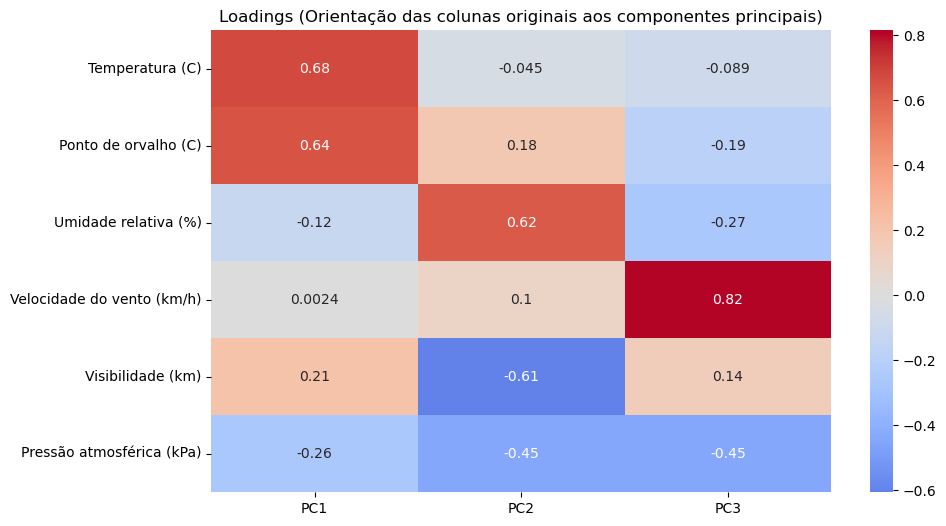

Razão da variância contemplada:
[0.35045353 0.30409954 0.20929208]


In [9]:
pca = PCA(n_components=3)
pca_components = pca.fit_transform(components)

pca_df = pd.DataFrame(data=pca_components, 
                      columns=['PC1', 'PC2', 'PC3'])
loadings_df = pd.DataFrame(
    pca.components_.T,  # Transpose to align columns with PCs
    columns=['PC1', 'PC2', 'PC3'],
    index=numeric_cols
)

plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title("Loadings (Orientação das colunas originais aos componentes principais)")
plt.show()
print("Razão da variância contemplada:")
print(pca.explained_variance_ratio_)

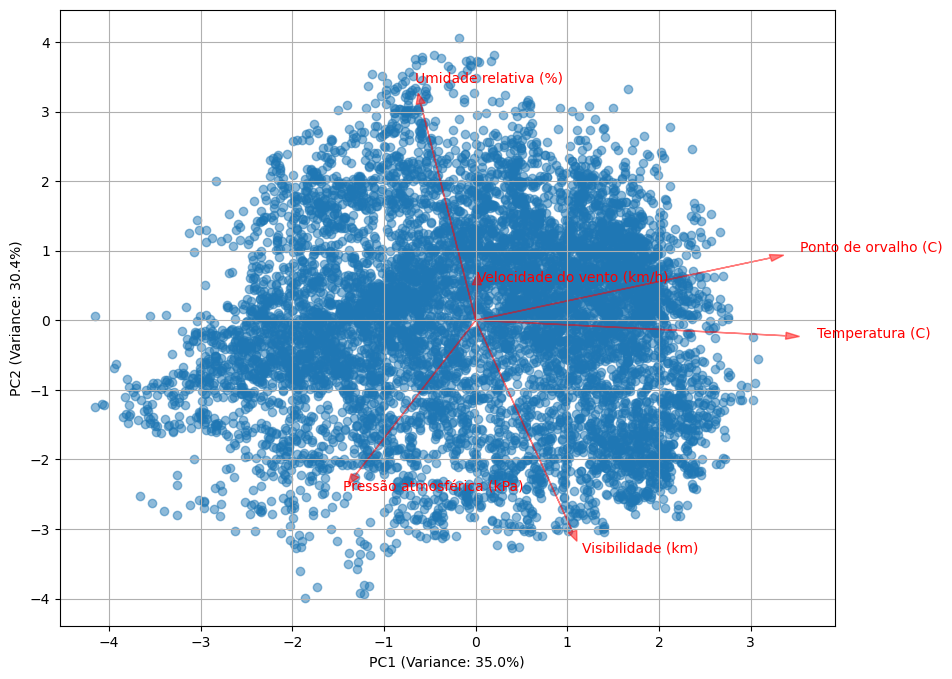

In [10]:
def biplot(score, loadings, labels):
    plt.figure(figsize=(10, 8))
    
    # Scores (data points)
    plt.scatter(score[:, 0], score[:, 1], alpha=0.5)
    
    # Loadings (arrows)
    for i, (x, y) in enumerate(zip(loadings[:, 0], loadings[:, 1])):
        plt.arrow(0, 0, x*5, y*5, color='red', alpha=0.5, head_width=0.1)
        plt.text(x*5.5, y*5.5, labels[i], color='red')
    
    plt.xlabel('PC1 (Variance: {:.1f}%)'.format(pca.explained_variance_ratio_[0]*100))
    plt.ylabel('PC2 (Variance: {:.1f}%)'.format(pca.explained_variance_ratio_[1]*100))
    plt.grid()

biplot(pca_components, pca.components_.T, numeric_cols)
plt.show()

## Bubble Plot

Na etapa anterior identificamos as seguintes relações:

- Umidade relativa e visibilidade são fatores fortemente (encontram-se alinhados em um mesmo eixo) e inversamente (possuem orientações opostas) relacionados entre si.
- Temperatura e visibilidade estão fracamente (encontram-se alinhados a diferentes eixos, com leve inclinação) e positivamente relacionados entre si.

A confecção de um Bubble plot nos permitirá visualizar as realações tidas entre os três fatores anteriormente mencionados. Tidos os eixos:

- $x$: Temperatura (°C)
- $y$: Umidade relativa (%)
- $d$ (diametro das bolhas): Visibilidade(km)

Se nossa análise estiver correta, teremos que o Bubble plot representará no canto superior esquedo bolhas de menor tamanho e no canto inferior direito bolhas de maior tamanho, com uma gradação entre estas. Escolhemos por representar a dois clusters (Inverno e Verão) de maior divergência entre si em diferentes cores e o resultado se vê à seguir.

In [11]:
import plotly.express as px
import pandas as pd
import plotly.io as pio
pio.renderers.default = 'notebook'  # or 'iframe_connected'


# Create the bubble plot
fig = px.scatter(
    df[df['Estação'].isin(['Verão', 'Inverno'])],
    x='Temperatura (C)',
    y='Umidade relativa (%)',
    size='Visibilidade (km)',
    color='Estação',
    opacity=0.6,  # Transparency (adjust as needed)
    hover_name='Condições climáticas',  # Optional: show weather condition on hover
    title='Temperatura vs. Umidade Relativa (Tamanho: Visibilidade)',
    labels={
        'Temperatura (C)': 'Temperatura (°C)',
        'Umidade relativa (%)': 'Umidade relativa (%)',
        'Visibilidade (km)': 'Visibilidade (km)'
    }
)

# Customize layout
fig.update_layout(
    hovermode='closest',
    xaxis_title='Temperatura (°C)',
    yaxis_title='Umidade Relativa (%)',
    legend_title='Estação'
)

# Adjust bubble size scaling (if bubbles are too small/large)
fig.update_traces(marker_sizemode='area', marker_sizeref=0.1)  # Tweak sizeref

# Show interactive plot
fig.show(renderer="browser")

Em uma análise mais detalhada, podemos identificar precisamente os meses em que se tem os maiores índices de visibilidade (Junho e Julho) e os menores (Dezembro)

In [16]:
import pandas as pd
import plotly.express as px

# Create month name mapping in Portuguese
meses_pt_br = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

# Convert datetime and extract Portuguese month names
df['Data e hora'] = pd.to_datetime(df['Data e hora'])
df['Mês'] = df['Data e hora'].dt.month.map(meses_pt_br)

# Filter for Winter/Summer
df_filtrado = df[df['Estação'].isin(['Inverno', 'Verão'])]

# Create bubble plot with Portuguese labels
fig = px.scatter(
    df_filtrado,
    x='Temperatura (C)',
    y='Umidade relativa (%)',
    size='Velocidade do vento (km/h)',
    color='Mês',
    facet_col='Estação',
    hover_name='Condições climáticas',
    title='Dados Meteorológicos: Inverno vs Verão (Cores por Mês)',
    labels={
        'Temperatura (C)': 'Temperatura (°C)',
        'Umidade relativa (%)': 'Umidade Relativa (%)',
        'Velocidade do vento (km/h)': 'Velocidade do Vento (km/h)',
        'Mês': 'Mês',
        'Estação': 'Estação'
    },
    category_orders={
        'Mês': ['Junho', 'Julho', 'Agosto', 'Dezembro', 'Janeiro', 'Fevereiro'],
        'Estação': ['Inverno', 'Verão']
    }
)

# Customize layout
fig.update_layout(
    hovermode='closest',
    xaxis_title='Temperatura (°C)',
    yaxis_title='Umidade Relativa (%)',
    legend_title='Estação'
)

# Adjust bubble size scaling (if bubbles are too small/large)
fig.update_traces(marker_sizemode='area', marker_sizeref=0.1)  # Tweak sizeref

# Show interactive plot
fig.show(renderer="browser")